#Assignment


Using the provided dataset, we will answer the following questions:

1. Which date had the most completed trips during the two week period?
2. What was the highest number of completed trips within a 24 hour period?
3. Which hour of the day had the most requests during the two week period?
4. What percentages of all zeroes during the two week period occurred on weekend (Friday at 5 pm to Sunday at 3 am)?
5. What is the weighted average ratio of completed trips per driver during the two week period?
6. In drafting a driver schedule in terms of 8 hours shifts, when are the busiest 8 consecutive hours over the two week period in terms of unique requests? A new shift starts in every 8 hours. Assume that a driver will work same shift each day.
7. True or False: Driver supply always increases when demand increases during the two week period.
8. In which 72 hour period is the ratio of Zeroes to Eyeballs the highest?
9. If you could add 5 drivers to any single hour of every day during the two week period, which hour should you add them to?
10. True or False: There is exactly two weeks of data in this analysis
11. Looking at the data from all two weeks, which time might make the most sense to consider a true "end day" instead of midnight? (i.e when are supply and demand at both their natural minimums)


#Data Exploration

Read the dataset and observe the columns as in the overview.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# read dataset
df = pd.read_csv("./dataset_1.csv")
df

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,NaN,8,6,0,2,2,14
2,NaN,9,8,3,0,0,14
3,NaN,10,9,2,0,1,14
4,NaN,11,11,1,4,4,11
...,...,...,...,...,...,...,...
331,NaN,2,3,3,0,2,0
332,NaN,3,3,3,0,1,0
333,NaN,4,1,1,0,0,0
334,NaN,5,4,2,1,1,3


In [3]:
df.head(10)

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,NaN,8,6,0,2,2,14
2,NaN,9,8,3,0,0,14
3,NaN,10,9,2,0,1,14
4,NaN,11,11,1,4,4,11
5,NaN,12,12,0,2,2,11
6,NaN,13,9,1,0,0,9
7,NaN,14,12,1,0,0,9
8,NaN,15,11,2,1,2,7
9,NaN,16,11,2,3,4,6


In [4]:
df.columns

Index(['Date', 'Time (Local)', 'Eyeballs ', 'Zeroes ', 'Completed Trips ',
       'Requests ', 'Unique Drivers'],
      dtype='object')

#Question 1
Which date had the most completed trips during the two week period?

In [5]:
# forward fill empty Dates
df = df.fillna(method="ffill")
df

<ipython-input-5-f412aba56454>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="ffill")


,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,10-Sep-12,8,6,0,2,2,14
2,10-Sep-12,9,8,3,0,0,14
3,10-Sep-12,10,9,2,0,1,14
4,10-Sep-12,11,11,1,4,4,11
...,...,...,...,...,...,...,...
331,24-Sep-12,2,3,3,0,2,0
332,24-Sep-12,3,3,3,0,1,0
333,24-Sep-12,4,1,1,0,0,0
334,24-Sep-12,5,4,2,1,1,3


In [6]:
# aggregate on Date since the question asks the completed trips by Date
df_agg_date = df.groupby('Date').sum().reset_index()
df_agg_date.nlargest(1, 'Completed Trips ')

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
12,22-Sep-12,276,960,219,248,344,292


In [7]:
df_agg_date.nlargest(1, 'Completed Trips ')['Date']

,Date
12,22-Sep-12


#Question 2
What was the highest number of completed trips within a 24 hour period?

In [9]:
# Create timestamp and set as index
df['Timestamp'] = df.apply(lambda row: create_timestamp(row['Date'], row['Time (Local)']), axis=1)
df = df.set_index("Timestamp")

# Get only numeric columns for the rolling sum
numeric_cols = df.select_dtypes(include=['number']).columns

# Calculate rolling sums with 24 hours period on numeric columns only
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=24)
df_agg_twentyfour_hrs = df[numeric_cols].rolling(window=indexer, min_periods=1).sum()

# Find the row with the largest value for 'Completed Trips'
# Make sure 'Completed Trips ' is a numeric column
if 'Completed Trips ' in numeric_cols:
    result = df_agg_twentyfour_hrs.nlargest(1, 'Completed Trips ')
    print(result)
else:
    print("'Completed Trips ' is not a numeric column. Check the column name and data type.")

                     Time (Local)  Eyeballs   Zeroes   Completed Trips   \
Timestamp                                                                 
2012-09-21 17:00:00         276.0     1015.0    207.0             278.0   

                     Requests   Unique Drivers  
Timestamp                                       
2012-09-21 17:00:00      367.0           349.0  


In [10]:
# parse time interval to output
time_format = "%Y/%m/%d %H:%M"
df_agg_twentyfour_hrs['Time Interval']  = df_agg_twentyfour_hrs.index.strftime(time_format) +  "-" + (df_agg_twentyfour_hrs.index + pd.Timedelta('24 hours')).strftime(time_format)
df_agg_twentyfour_hrs

,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Time Interval
Timestamp,,,,,,,
2012-09-10 07:00:00,276.0,212.0,38.0,29.0,39.0,150.0,2012/09/10 07:00-2012/09/11 07:00
2012-09-10 08:00:00,276.0,217.0,38.0,29.0,39.0,146.0,2012/09/10 08:00-2012/09/11 08:00
2012-09-10 09:00:00,276.0,222.0,40.0,27.0,37.0,138.0,2012/09/10 09:00-2012/09/11 09:00
2012-09-10 10:00:00,276.0,229.0,39.0,27.0,37.0,130.0,2012/09/10 10:00-2012/09/11 10:00
2012-09-10 11:00:00,276.0,232.0,38.0,28.0,37.0,124.0,2012/09/10 11:00-2012/09/11 11:00
...,...,...,...,...,...,...,...
2012-09-24 02:00:00,20.0,20.0,10.0,3.0,6.0,10.0,2012/09/24 02:00-2012/09/25 02:00
2012-09-24 03:00:00,18.0,17.0,7.0,3.0,4.0,10.0,2012/09/24 03:00-2012/09/25 03:00
2012-09-24 04:00:00,15.0,14.0,4.0,3.0,3.0,10.0,2012/09/24 04:00-2012/09/25 04:00


In [11]:
completed_trips = df_agg_twentyfour_hrs.nlargest(1, 'Completed Trips ')['Completed Trips '].values[0]
time_interval = df_agg_twentyfour_hrs.nlargest(1, 'Completed Trips ')['Time Interval'].values[0]
print("Number of completed trips:", completed_trips)
print("Time Interval:", time_interval)

Number of completed trips: 278.0
Time Interval: 2012/09/21 17:00-2012/09/22 17:00


#Question 3
Which hour of the day had the most requests during the two week period?


In [12]:
# aggregate on hour
df_agg_time = df.groupby('Time (Local)').sum().reset_index()
df_agg_time.nlargest(1, 'Requests ')

,Time (Local),Date,Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
23,23,10-Sep-1211-Sep-1212-Sep-1213-Sep-1214-Sep-121...,488,193,126,184,119


In [13]:
df_agg_time.nlargest(1, 'Requests ')['Time (Local)']

,Time (Local)
23,23


#Question 4
What percentages of all zeroes during the two week period occurred on weekend (Friday at 5 pm to Sunday at 3 am)?

In [14]:
# all zeroes in the dataset
total_zeroes = df['Zeroes '].sum()
total_zeroes

np.int64(1429)

In [15]:
# all zeroes in weekend based on given condition
df['Day'] = pd.to_datetime(df['Date']).dt.dayofweek
weekend_zeroes = df[((df['Day'] == 4) & (df['Time (Local)'] >= 17))
                          | (df['Day'] == 5) |
                          ((df['Day'] == 6) & (df['Time (Local)'] < 3))]['Zeroes '].sum()
weekend_zeroes

<ipython-input-15-d25566ab2e51>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Day'] = pd.to_datetime(df['Date']).dt.dayofweek


np.int64(641)

In [16]:
# calculate the percentage
weekend_zeroes_pct = weekend_zeroes / total_zeroes * 100
print(weekend_zeroes_pct,'%')

44.856543037088876 %


#Question 5
What is the weighted average ratio of completed trips per driver during the two week period?

In [17]:
# calculate the ratio
df['completed_trip_ratio_per_driver'] = df['Completed Trips '] / df['Unique Drivers']
df

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Day,completed_trip_ratio_per_driver
Timestamp,,,,,,,,,
2012-09-10 07:00:00,10-Sep-12,7,5,0,2,2,9,0,0.222222
2012-09-10 08:00:00,10-Sep-12,8,6,0,2,2,14,0,0.142857
2012-09-10 09:00:00,10-Sep-12,9,8,3,0,0,14,0,0.000000
2012-09-10 10:00:00,10-Sep-12,10,9,2,0,1,14,0,0.000000
2012-09-10 11:00:00,10-Sep-12,11,11,1,4,4,11,0,0.363636
...,...,...,...,...,...,...,...,...,...
2012-09-24 02:00:00,24-Sep-12,2,3,3,0,2,0,0,NaN
2012-09-24 03:00:00,24-Sep-12,3,3,3,0,1,0,0,NaN
2012-09-24 04:00:00,24-Sep-12,4,1,1,0,0,0,0,NaN


In [18]:
# drop rows with nan
dataset_without_zero_unique_driver = df[df['Unique Drivers'] > 0]
# calculate weighted average by giving weight as day's completed trip ratio all completed trips
weighted_average_ratio = np.average(dataset_without_zero_unique_driver['completed_trip_ratio_per_driver'], weights=dataset_without_zero_unique_driver['Completed Trips '])
weighted_average_ratio

np.float64(0.8282775715092395)

In [19]:
# check it is not same with normal average
np.average(dataset_without_zero_unique_driver['completed_trip_ratio_per_driver'])

np.float64(0.4743397876937869)

#Question 6
In drafting a driver schedule in terms of 8 hours shifts, when are the busiest 8 consecutive hours over the two week period in terms of unique requests? A new shift starts in every 8 hours. Assume that a driver will work same shift each day.



In [28]:
# Create Timestamp and filter numeric columns before resampling
df['Timestamp'] = df.apply(lambda row: create_timestamp(row['Date'], row['Time (Local)']), axis=1)
numeric_cols = df.select_dtypes(include=['number']).columns
df_agg_eight_hrs = df.set_index("Timestamp")[numeric_cols].resample('8H').sum()

<ipython-input-28-11308ea57dd3>:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_agg_eight_hrs = df.set_index("Timestamp")[numeric_cols].resample('8H').sum()


In [29]:
time_format = "%Y/%m/%d %H:%M"
df_agg_eight_hrs['Time Interval']  = df_agg_eight_hrs.index.strftime(time_format) +  "-" + (df_agg_eight_hrs.index + pd.Timedelta('8 hours')).strftime(time_format)
df_agg_eight_hrs

,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Day,completed_trip_ratio_per_driver,Time Interval
Timestamp,,,,,,,,,
2012-09-10 00:00:00,7,5,0,2,2,9,0,0.222222,2012/09/10 00:00-2012/09/10 08:00
2012-09-10 08:00:00,92,78,10,9,11,89,0,0.831169,2012/09/10 08:00-2012/09/10 16:00
2012-09-10 16:00:00,156,106,16,15,21,40,0,3.047619,2012/09/10 16:00-2012/09/11 00:00
2012-09-11 00:00:00,28,33,12,5,7,17,8,1.400000,2012/09/11 00:00-2012/09/11 08:00
2012-09-11 08:00:00,92,108,11,5,6,58,8,0.690079,2012/09/11 08:00-2012/09/11 16:00
2012-09-11 16:00:00,156,173,41,30,39,57,8,4.145887,2012/09/11 16:00-2012/09/12 00:00
2012-09-12 00:00:00,28,39,16,6,13,12,16,2.000000,2012/09/12 00:00-2012/09/12 08:00
2012-09-12 08:00:00,92,213,15,52,60,113,16,3.766558,2012/09/12 08:00-2012/09/12 16:00
2012-09-12 16:00:00,156,171,24,33,41,76,16,3.704240,2012/09/12 16:00-2012/09/13 00:00


In [30]:
df_agg_eight_hrs.nlargest(1, 'Requests ')

,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Day,completed_trip_ratio_per_driver,Time Interval
Timestamp,,,,,,,,,
2012-09-21 16:00:00,156,515,88,153,192,198,32,6.357265,2012/09/21 16:00-2012/09/22 00:00


In [31]:
# output time interval
df_agg_eight_hrs.nlargest(1, 'Requests ')['Time Interval']

,Time Interval
Timestamp,
2012-09-21 16:00:00,2012/09/21 16:00-2012/09/22 00:00


#Question 7
True or False: Driver supply always increases when demand increases during the two week period.

Tip: Visualize the data to confirm your answer if needed.

In [32]:
# create empty dataframe with only timestamps
difference_df = pd.DataFrame(df['Timestamp'])
# calculate request differences to catch request increases
difference_df['request_diff'] = df['Requests '].shift(-1) - df['Requests ']
# do same of supply side
difference_df['supply_diff'] = df['Unique Drivers'].shift(-1) - df['Unique Drivers']
difference_df

,Timestamp,request_diff,supply_diff
Timestamp,,,
2012-09-10 07:00:00,2012-09-10 07:00:00,0.0,5.0
2012-09-10 08:00:00,2012-09-10 08:00:00,-2.0,0.0
2012-09-10 09:00:00,2012-09-10 09:00:00,1.0,0.0
2012-09-10 10:00:00,2012-09-10 10:00:00,3.0,-3.0
2012-09-10 11:00:00,2012-09-10 11:00:00,-2.0,0.0
...,...,...,...
2012-09-24 02:00:00,2012-09-24 02:00:00,-1.0,0.0
2012-09-24 03:00:00,2012-09-24 03:00:00,-1.0,0.0
2012-09-24 04:00:00,2012-09-24 04:00:00,1.0,3.0


In [33]:
# check if request increases, supply also increases
(difference_df[difference_df['request_diff'] > 0]['supply_diff'] > 0).all().item()

False

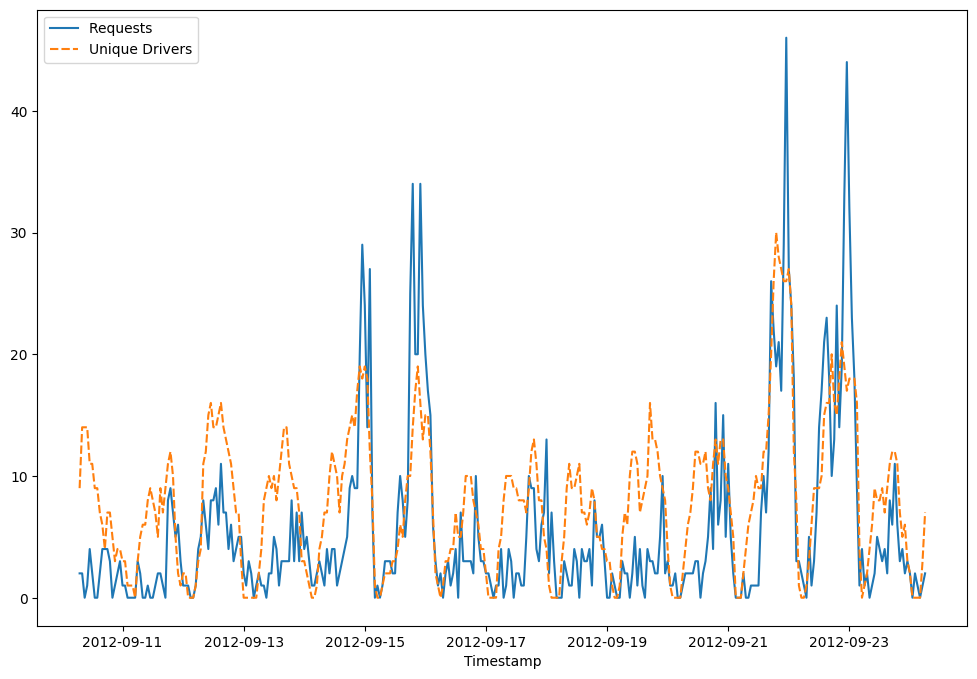

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.lineplot(data=df[['Requests ', 'Unique Drivers', 'Timestamp']])
plt.show()

#Question 8
In which 72 hour period is the ratio of Zeroes to Eyeballs the highest?

In [36]:
# Filter only numeric columns for the rolling operation
numeric_df = df.select_dtypes(include=['number'])

# Keep Timestamp for indexing
df_with_timestamp = df[['Timestamp']].join(numeric_df)

# Calculate rolling sums by 3 days/72 hours
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=72)
df_agg_three_days = df_with_timestamp.set_index("Timestamp").rolling(window=indexer, min_periods=1).sum().reset_index()

# Now calculate the ratio
if 'Zeroes ' in df_agg_three_days.columns and 'Eyeballs ' in df_agg_three_days.columns:
    df_agg_three_days['zeros_to_eyeballs_ratio'] = df_agg_three_days['Zeroes '] / df_agg_three_days['Eyeballs ']
else:
    print("Column 'Zeroes ' or 'Eyeballs ' not found in the aggregated dataframe")

In [37]:
df_agg_three_days = df_agg_three_days[df_agg_three_days['Timestamp'] <= (df_agg_three_days['Timestamp'].max() - pd.Timedelta(days=3))]

time_format = "%Y/%m/%d %H:%M"
df_agg_three_days['Time Interval']  = df_agg_three_days['Timestamp'].dt.strftime(time_format) +  "-" + (df_agg_three_days['Timestamp'] + pd.Timedelta('3 days')).dt.strftime(time_format)
df_agg_three_days

<ipython-input-37-69760a12895e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agg_three_days['Time Interval']  = df_agg_three_days['Timestamp'].dt.strftime(time_format) +  "-" + (df_agg_three_days['Timestamp'] + pd.Timedelta('3 days')).dt.strftime(time_format)


,Timestamp,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Day,completed_trip_ratio_per_driver,zeros_to_eyeballs_ratio,Time Interval
0,2012-09-10 07:00:00,828.0,956.0,172.0,159.0,211.0,473.0,93.0,20.807776,0.179916,2012/09/10 07:00-2012/09/13 07:00
1,2012-09-10 08:00:00,828.0,961.0,173.0,158.0,210.0,468.0,96.0,20.835553,0.180021,2012/09/10 08:00-2012/09/13 08:00
2,2012-09-10 09:00:00,828.0,964.0,174.0,157.0,209.0,462.0,99.0,20.817696,0.180498,2012/09/10 09:00-2012/09/13 09:00
3,2012-09-10 10:00:00,828.0,970.0,175.0,157.0,209.0,457.0,102.0,20.817696,0.180412,2012/09/10 10:00-2012/09/13 10:00
4,2012-09-10 11:00:00,828.0,976.0,176.0,159.0,210.0,453.0,105.0,21.017696,0.180328,2012/09/10 11:00-2012/09/13 11:00
...,...,...,...,...,...,...,...,...,...,...,...
259,2012-09-21 02:00:00,828.0,2209.0,465.0,535.0,724.0,780.0,352.0,39.191989,0.210502,2012/09/21 02:00-2012/09/24 02:00
260,2012-09-21 03:00:00,828.0,2207.0,468.0,534.0,724.0,775.0,348.0,38.991989,0.212053,2012/09/21 03:00-2012/09/24 03:00
261,2012-09-21 04:00:00,828.0,2207.0,468.0,534.0,725.0,775.0,344.0,38.991989,0.212053,2012/09/21 04:00-2012/09/24 04:00
262,2012-09-21 05:00:00,828.0,2208.0,469.0,534.0,725.0,775.0,340.0,38.991989,0.212409,2012/09/21 05:00-2012/09/24 05:00


In [38]:
df_agg_three_days.nlargest(1, 'zeros_to_eyeballs_ratio')['zeros_to_eyeballs_ratio']

,zeros_to_eyeballs_ratio
118,0.292977


In [39]:
df_agg_three_days.nlargest(1, 'zeros_to_eyeballs_ratio')['Time Interval']

,Time Interval
118,2012/09/15 05:00-2012/09/18 05:00


#Question 9
If you could add 5 drivers to any single hour of every day during the two week period, which hour should you add them to?

Hint: Consider both rider eyeballs and driver supply when choosing

In [41]:
# First, identify and select only numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

# Make sure to include 'Time (Local)' for grouping
cols_to_use = ['Time (Local)'] + [col for col in numeric_cols if col != 'Time (Local)']

# Use only the relevant columns for groupby and sum
df_agg_time = df[cols_to_use].groupby('Time (Local)').sum().reset_index()

# Calculate the ratio if the required columns exist
if 'Eyeballs ' in df_agg_time.columns and 'Unique Drivers' in df_agg_time.columns:
    df_agg_time['eyeball_to_driver_ratio'] = df_agg_time['Eyeballs '] / df_agg_time['Unique Drivers']
    result = df_agg_time.nlargest(1, 'eyeball_to_driver_ratio')
    print(result)
else:
    missing_cols = []
    if 'Eyeballs ' not in df_agg_time.columns:
        missing_cols.append('Eyeballs ')
    if 'Unique Drivers' not in df_agg_time.columns:
        missing_cols.append('Unique Drivers')
    print(f"Required columns {missing_cols} are missing from the dataframe")

    Time (Local)  Eyeballs   Zeroes   Completed Trips   Requests   \
23            23        488      193               126        184   

    Unique Drivers  Day  completed_trip_ratio_per_driver  \
23             119   42                        11.269306   

    eyeball_to_driver_ratio  
23                  4.10084  


In [42]:
df_agg_time.nlargest(1, 'eyeball_to_driver_ratio')['Time (Local)']

,Time (Local)
23,23


#Question 10
True or False: There is exactly two weeks of data in this analysis

In [43]:
# check time difference between the beginning and end
(df['Timestamp'][df.shape[0]-1]-df['Timestamp'][0])

<ipython-input-43-7cb00cba4949>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  (df['Timestamp'][df.shape[0]-1]-df['Timestamp'][0])


Timedelta('13 days 23:00:00')

In [44]:
# compare it with timedelta 14 days to see if the difference exactly matches as 14 days
pd.Timedelta('14 days') == df['Timestamp'][df.shape[0]-1]-df['Timestamp'][0]

<ipython-input-44-e460118120e0>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pd.Timedelta('14 days') == df['Timestamp'][df.shape[0]-1]-df['Timestamp'][0]


False

In [45]:
# the difference is less than 14 days
pd.Timedelta('14 days') > df['Timestamp'][df.shape[0]-1]-df['Timestamp'][0]

<ipython-input-45-8f119e4b9729>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pd.Timedelta('14 days') > df['Timestamp'][df.shape[0]-1]-df['Timestamp'][0]


True

#Question 11
Looking at the data from all two weeks, which time might make the most sense to consider a true "end day" instead of midnight? (i.e when are supply and demand at both their natural minimums)

In [46]:
# find min supply and demand per day
df_min_supply_per_day = df.groupby(['Date'])['Unique Drivers'].min().reset_index().rename(columns={'Unique Drivers':'min_supply_per_day'})
df_min_demand_per_day = df.groupby(['Date'])['Requests '].min().reset_index().rename(columns={'Requests ':'min_demand_per_day'})

# merge demand and supply based on date
supply_demand = pd.merge(df_min_supply_per_day, df_min_demand_per_day, on="Date")
supply_demand

,Date,min_supply_per_day,min_demand_per_day
0,10-Sep-12,3,0
1,11-Sep-12,0,0
2,12-Sep-12,0,0
3,13-Sep-12,0,0
4,14-Sep-12,0,1
5,15-Sep-12,0,0
6,16-Sep-12,0,0
7,17-Sep-12,0,0
8,18-Sep-12,0,0
9,19-Sep-12,0,0


In [47]:
# merge found min values with initial dataset on Date
dataset_w_min_supply_demand = pd.merge(df, supply_demand, on="Date")
dataset_w_min_supply_demand

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers,Day,completed_trip_ratio_per_driver,Timestamp,min_supply_per_day,min_demand_per_day
0,10-Sep-12,7,5,0,2,2,9,0,0.222222,2012-09-10 07:00:00,3,0
1,10-Sep-12,8,6,0,2,2,14,0,0.142857,2012-09-10 08:00:00,3,0
2,10-Sep-12,9,8,3,0,0,14,0,0.000000,2012-09-10 09:00:00,3,0
3,10-Sep-12,10,9,2,0,1,14,0,0.000000,2012-09-10 10:00:00,3,0
4,10-Sep-12,11,11,1,4,4,11,0,0.363636,2012-09-10 11:00:00,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
331,24-Sep-12,2,3,3,0,2,0,0,NaN,2012-09-24 02:00:00,0,0
332,24-Sep-12,3,3,3,0,1,0,0,NaN,2012-09-24 03:00:00,0,0
333,24-Sep-12,4,1,1,0,0,0,0,NaN,2012-09-24 04:00:00,0,0
334,24-Sep-12,5,4,2,1,1,3,0,0.333333,2012-09-24 05:00:00,0,0


In [48]:
# check the exact matches with natural minimums
min_point = dataset_w_min_supply_demand[(dataset_w_min_supply_demand.min_supply_per_day == dataset_w_min_supply_demand['Unique Drivers']) &
                           (dataset_w_min_supply_demand.min_demand_per_day == dataset_w_min_supply_demand['Requests '])]['Time (Local)'].mode()
min_point

,Time (Local)
0,4


In [49]:
# minimum hour is 4 am
min_point[0]

np.int64(4)

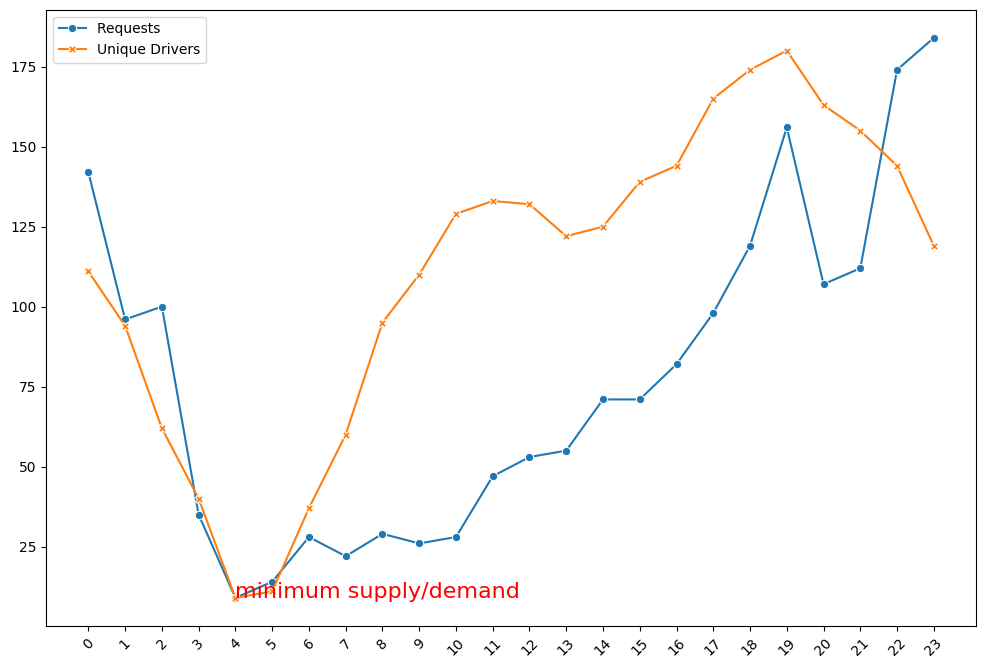

In [52]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

if 'Time (Local)' in numeric_cols:
    numeric_cols.remove('Time (Local)')

df_agg_time = df.groupby('Time (Local)')[numeric_cols].sum().reset_index()

if 'Requests ' in df_agg_time.columns:
    min_point = df_agg_time['Requests '].idxmin()
    min_point_value = df_agg_time['Requests '][min_point]

    plt.figure(figsize=(12,8))
    fig = sns.lineplot(data=df_agg_time[['Requests ', 'Unique Drivers']], markers=True, dashes=False)

    plt.xticks(range(len(df_agg_time)), df_agg_time['Time (Local)'], rotation=45)

    plt.annotate('minimum supply/demand',
                xy=(min_point, min_point_value),
                color='r',
                fontsize=16)
    plt.show()
else:
    print("'Requests ' column not found in the dataframe")